In [298]:
import pandas as pd # Manejo de data estructurada (Dataframe)
import numpy as np #Manejo de matrices
import matplotlib as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline 
import seaborn as sns
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [299]:
# Lectura de la base de datos desde Github en internet y asignación a la variable
path = "https://raw.githubusercontent.com/AdrianaGranados/Prueba/main/DataAirbnbLimpiezadatos2.csv"
airbnb = pd.read_csv(path)
 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.



In [300]:
#aparencia de la tabla luego de procesarla
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,19/10/2018,0.21,6.0,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,21/05/2019,0.38,2.0,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1.0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,5/07/2019,4.64,1.0,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,19/11/2018,0.10,1.0,0


In [301]:
airbnb.info() #Acá podemos observar el tipo de dato y la cantidad de registros asociados a cada variable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48895 non-null  int64 
 1   name                            48879 non-null  object
 2   host_id                         48894 non-null  object
 3   host_name                       48874 non-null  object
 4   neighbourhood_group             48895 non-null  object
 5   neighbourhood                   48895 non-null  object
 6   latitude                        48895 non-null  object
 7   longitude                       48895 non-null  object
 8   room_type                       48895 non-null  object
 9   price                           48895 non-null  object
 10  minimum_nights                  48895 non-null  object
 11  number_of_reviews               48895 non-null  object
 12  last_review                     38857 non-null

In [302]:
airbnb['room_type'].value_counts() #Se realiza un conteo por tipo de habitacion

Entire home/apt    25378
Private room       22287
Shared room         1148
-7.402.375             1
-7.378.175             1
                   ...  
-7.395.605             1
-7.395.361             1
-7.395.472             1
-73.961                1
-739.071               1
Name: room_type, Length: 85, dtype: int64

In [303]:
# Imprime el número de valores faltantes
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               1
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10047
calculated_host_listings_count       14
availability_365                      5
dtype: int64

In [304]:
# Encuentra el número de valores únicos en la columna room_type
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'South Slope',
       '-7.391.987', '-7.397.352', '-7.393.635', '-739.863', '-7.392.873',
       '-7.398.095', '-7.393.985', '-7.398.337', '-7.393.819',
       '-7.391.018', '-7.391.344', '-7.396.811', '-7.399.829',
       '-7.393.294', '-739.834', '-7.399.383', '-7.396.671', '-7.396.065',
       '-7.395.179', '-7.392.165', '-73.961', '-7.395.472', '-7.395.361',
       '-7.395.605', '-7.387.733', '-7.394.098', '-7.392.092',
       '-7.400.094', '-7.393.502', '-7.399.238', '4.078.081',
       '-7.395.089', '-7.382.617', '-7.393.891', '-7.395.065',
       '-7.394.934', '-7.382.737', '-739.533', 'Erin V.', 'Sunnyside',
       '-7.394.642', '-7.386.465', '-7.386.435', '-7.386.418',
       '-7.389.365', '-7.394.085', '-7.393.828', '4.072.822',
       '-7.389.327', '-7.378.275', '-7.394.003', '-7.393.657',
       '-7.398.316', '-7.400.763', '-7.391.956', '-7.378.237',
       '-7.394.269', '-7.378.175', '4.069.743', '-7.402.375', '-739.

In [305]:
room_type2= 'room_type'

Codificamos las variable categorica room_type

In [306]:
room_type= airbnb[room_type2] = airbnb[room_type2].replace(['Entire home/apt','Private room','Shared room', 'Erin V.','Sunnyside', 'South Slope'],[0,1,2,-1,-2,-3])

In [307]:
airbnb['room_type'].unique()

array([1, 0, 2, -3, '-7.391.987', '-7.397.352', '-7.393.635', '-739.863',
       '-7.392.873', '-7.398.095', '-7.393.985', '-7.398.337',
       '-7.393.819', '-7.391.018', '-7.391.344', '-7.396.811',
       '-7.399.829', '-7.393.294', '-739.834', '-7.399.383', '-7.396.671',
       '-7.396.065', '-7.395.179', '-7.392.165', '-73.961', '-7.395.472',
       '-7.395.361', '-7.395.605', '-7.387.733', '-7.394.098',
       '-7.392.092', '-7.400.094', '-7.393.502', '-7.399.238',
       '4.078.081', '-7.395.089', '-7.382.617', '-7.393.891',
       '-7.395.065', '-7.394.934', '-7.382.737', '-739.533', -1, -2,
       '-7.394.642', '-7.386.465', '-7.386.435', '-7.386.418',
       '-7.389.365', '-7.394.085', '-7.393.828', '4.072.822',
       '-7.389.327', '-7.378.275', '-7.394.003', '-7.393.657',
       '-7.398.316', '-7.400.763', '-7.391.956', '-7.378.237',
       '-7.394.269', '-7.378.175', '4.069.743', '-7.402.375', '-739.074',
       '-7.390.256', '-737.823', '4.070.402', '-7.391.996', '-7.396.0

Eliminando **outliers**

In [308]:
airbnb = airbnb[airbnb['room_type'] !='-7.391.987'] #eliminamos uno por uno los datos atipicos

In [309]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.635']#eliminamos uno por uno los datos atipicos

In [310]:
airbnb = airbnb[airbnb['room_type'] !='-739.863']#eliminamos uno por uno los datos atipicos

In [311]:
airbnb = airbnb[airbnb['room_type'] !=-3]#eliminamos uno por uno los datos atipicos

In [312]:
airbnb = airbnb[airbnb['room_type'] !='-7.398.095']#eliminamos uno por uno los datos atipicos

In [313]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.985']

In [314]:
airbnb = airbnb[airbnb['room_type'] !='-7.398.337']

In [315]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.819']

In [316]:
airbnb = airbnb[airbnb['room_type'] !='-7.391.018']

In [317]:
airbnb = airbnb[airbnb['room_type'] !='-7.391.344']

In [318]:
airbnb = airbnb[airbnb['room_type'] !='-7.396.811']

In [319]:
airbnb = airbnb[airbnb['room_type'] !='-7.399.829']

In [320]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.294']

In [321]:
airbnb = airbnb[airbnb['room_type'] !='-739.834']

In [322]:
airbnb = airbnb[airbnb['room_type'] !='-7.399.383']

In [323]:
airbnb = airbnb[airbnb['room_type'] !='-7.396.671']

In [324]:
airbnb = airbnb[airbnb['room_type'] !='-7.396.065']

In [325]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.179']

In [326]:
airbnb = airbnb[airbnb['room_type'] !='-7.392.165']

In [327]:
airbnb = airbnb[airbnb['room_type'] !='-73.961']

In [328]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.472']

In [329]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.361']

In [330]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.605']

In [331]:
airbnb = airbnb[airbnb['room_type'] !='-7.387.733']

In [332]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.098']

In [333]:
airbnb = airbnb[airbnb['room_type'] !='-7.392.092']

In [334]:
airbnb = airbnb[airbnb['room_type'] !='-7.400.094']

In [335]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.502']

In [336]:
airbnb = airbnb[airbnb['room_type'] !='-7.399.238']

In [337]:
airbnb = airbnb[airbnb['room_type'] !='4.078.081']

In [338]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.089']

In [339]:
airbnb = airbnb[airbnb['room_type'] !='-7.382.617']

In [340]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.891']

In [341]:
airbnb = airbnb[airbnb['room_type'] !='-7.395.065']

In [342]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.934']

In [343]:
airbnb = airbnb[airbnb['room_type'] !='-7.382.737']

In [344]:
airbnb = airbnb[airbnb['room_type'] !='-739.533']

In [345]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.642']

In [346]:
airbnb = airbnb[airbnb['room_type'] !='-7.386.465']

In [347]:
airbnb = airbnb[airbnb['room_type'] !='-7.386.435']

In [348]:
airbnb = airbnb[airbnb['room_type'] !='-7.386.418']

In [349]:
airbnb = airbnb[airbnb['room_type'] !='-1']

In [350]:
airbnb = airbnb[airbnb['room_type'] !='-2']

In [351]:
airbnb = airbnb[airbnb['room_type'] !='-7.389.365']

In [352]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.085']

In [353]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.828']

In [354]:
airbnb = airbnb[airbnb['room_type'] !='4.072.822']

In [355]:
airbnb = airbnb[airbnb['room_type'] !='-7.389.327']

In [356]:
airbnb = airbnb[airbnb['room_type'] !='-7.378.275']

In [357]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.003']

In [358]:
airbnb = airbnb[airbnb['room_type'] !='-7.393.657']

In [359]:
airbnb = airbnb[airbnb['room_type'] !='-7.398.316']

In [360]:
airbnb = airbnb[airbnb['room_type'] !='-7.400.763']

In [361]:
airbnb = airbnb[airbnb['room_type'] !='-7.391.956']

In [362]:
airbnb = airbnb[airbnb['room_type'] !='-7.378.237']

In [363]:
airbnb = airbnb[airbnb['room_type'] !='-7.394.269']

In [364]:
airbnb = airbnb[airbnb['room_type'] !='-7.378.175']

In [365]:
airbnb = airbnb[airbnb['room_type'] !='4.069.743']

In [366]:
airbnb = airbnb[airbnb['room_type'] !='-7.402.375']

In [367]:
airbnb = airbnb[airbnb['room_type'] !='-739.074']

In [368]:
airbnb = airbnb[airbnb['room_type'] !='-7.390.256']

In [369]:
airbnb = airbnb[airbnb['room_type'] !='-737.823']

In [370]:
airbnb = airbnb[airbnb['room_type'] !='4.070.402']

In [371]:
airbnb = airbnb[airbnb['room_type'] !='-7.391.996']

In [372]:
airbnb = airbnb[airbnb['room_type'] !='-7.396.088']

In [373]:
airbnb = airbnb[airbnb['room_type'] !='-7.387.675']

In [374]:
airbnb = airbnb[airbnb['room_type'] !='-7.387.507']

In [375]:
airbnb = airbnb[airbnb['room_type'] !='-7.387.639']

In [376]:
airbnb = airbnb[airbnb['room_type'] !='4.068.057']

In [377]:
airbnb = airbnb[airbnb['room_type'] !='-7.421.238']

In [378]:
airbnb = airbnb[airbnb['room_type'] !='-737.961']

In [379]:
airbnb = airbnb[airbnb['room_type'] !='-7.387.698']

In [380]:
airbnb = airbnb[airbnb['room_type'] !='-7.392.821']

In [381]:
airbnb = airbnb[airbnb['room_type'] !='-7.392.871']

In [382]:
airbnb = airbnb[airbnb['room_type'] !='40.739']

In [383]:
airbnb = airbnb[airbnb['room_type'] !='4.073.864']

In [384]:
airbnb = airbnb[airbnb['room_type'] !='4.073.913']

In [385]:
airbnb = airbnb[airbnb['room_type'] !='4.073.997']

In [386]:
airbnb = airbnb[airbnb['room_type'] !='4.078.316']

In [387]:
airbnb = airbnb[airbnb['room_type'] !='-7.397.352']

In [388]:
airbnb = airbnb[airbnb['room_type'] !='-739.071']

In [389]:
airbnb = airbnb[airbnb['room_type'] !='-7.392.873']

In [390]:
airbnb = airbnb[airbnb['room_type'] !=-1]

In [391]:
airbnb = airbnb[airbnb['room_type'] !=-2]

Verificamos room_type procesada

In [392]:
airbnb['room_type'].unique() # 0= 'Entire home/apt' & 1='Private room'   2='Shared room'

array([1, 0, 2], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



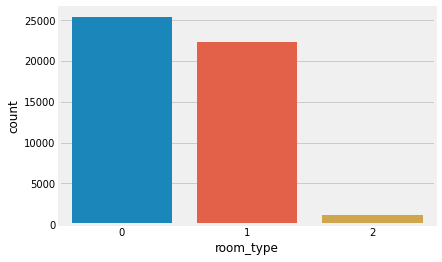

In [393]:
sns_plot = sns.countplot(airbnb['room_type'],label="Count")
 # Donde el tipo de habitación corresponde a 0= 'Entire home/apt' & 1='Private room'   2='Shared room'